In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df =  pd.read_pickle("/Users/matianjun/Documents/kdd_competition/final_df.pkl")
# df.drop_duplicates(inplace=True)

In [4]:
df.head()

,user_id,item_id,time,user_age_level,user_gender,user_city_level,txt_vec,img_vec
0,4965,18,0.983763,4.0,F,1.0,"4.001298904418945, -0.1597503125667572, 0.7781...","-2.0337302684783936, -0.875639021396637, 1.105..."
1,4965,18,0.983991,4.0,F,1.0,"4.001298904418945, -0.1597503125667572, 0.7781...","-2.0337302684783936, -0.875639021396637, 1.105..."
4,3157,18,0.984165,3.0,F,4.0,"4.001298904418945, -0.1597503125667572, 0.7781...","-2.0337302684783936, -0.875639021396637, 1.105..."
7,4965,106632,0.983842,4.0,F,1.0,"-0.23744818568229675, -0.5372360348701477, 0.5...","-3.498582124710083, 1.5218520164489746, -0.344..."
8,20572,106632,0.983844,2.0,F,2.0,"-0.23744818568229675, -0.5372360348701477, 0.5...","-3.498582124710083, 1.5218520164489746, -0.344..."


In [5]:
len(df.user_id.unique())

6002

In [6]:
len(df.item_id.unique())

75093

In [7]:
len(df.user_age_level.unique())

9

In [95]:
len(df.user_city_level.unique())

7

In [8]:
df.user_gender.unique()

array(['F', 'M', nan], dtype=object)

In [ ]:
9 * 7 * 3

In [98]:
df.user_city_level.unique()

array([ 1.,  4.,  2.,  5.,  3.,  6., nan])

In [99]:
df.groupby(["user_city_level","user_gender","user_age_level"]).count().head(10)

user_id  item_id  time  txt_vec  \
user_city_level user_gender user_age_level                                    
1.0             F           1.0                 290      290   290      290   
                            2.0                2461     2461  2461     2461   
                            3.0                4038     4038  4038     4038   
                            4.0                5900     5900  5900     5900   
                            5.0                4614     4614  4614     4614   
                            6.0                2555     2555  2555     2555   
                            7.0                1882     1882  1882     1882   
                            8.0                 372      372   372      372   
                M           1.0                  29       29    29       29   
                            2.0                 217      217   217      217   

                                            img_vec  
user_city_level user_gender user_age_level           
1.0             F           1.0                 290  
                            2.0                2461  
                            3.0                4038  
                            4.0                5900  
                            5.0                4614  
                            6.0                2555  
                            7.0                1882  
                            8.0                 372  
                M           1.0                  29  
                            2.0                 217

In [ ]:
df.explode()

In [ ]:
# unnesting(df,["txt_vec"]+["txt_{}".format(i) for i in range(128)])

In [ ]:
df.head()

In [ ]:
df.time.describe()

## featudescribe
* 点击数聚类
* 总时长
* 最短时长
* 最长时长
* 间隔时间
* 驻留时间

In [ ]:
4.7

In [111]:
((df.groupby(["user_id"])['time'].max() - df.groupby(["user_id"])['time'].min())*(10**6)).describe()

count    6002.000000
mean      340.146413
std       158.429736
min         0.000000
25%       202.994490
50%       388.314655
75%       484.478216
max       544.591265
Name: time, dtype: float64

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  """Entry point for launching an IPython kernel.


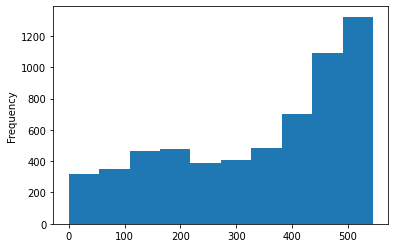

In [147]:
((df.groupby(["user_id"])['time'].max() - df.groupby(["user_id"])['time'].min())*(10**6)).plot('hist')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  """Entry point for launching an IPython kernel.


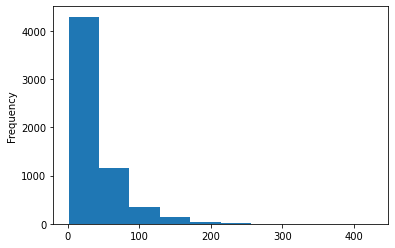

In [144]:
df.groupby(["user_id"])["item_id"].count().plot("hist")

In [142]:
df.groupby(["user_id"])["item_id"].count().describe()

count    6002.000000
mean       36.793236
std        36.853689
min         1.000000
25%        12.000000
50%        25.000000
75%        49.000000
max       427.000000
Name: item_id, dtype: float64

In [146]:
df.groupby(["user_id"])["item_id"].count()

user_id
10        77
13        27
16        20
17         5
18        12
        ... 
35334     10
35340    124
35363    333
35384      5
35432      8
Name: item_id, Length: 6002, dtype: int64